<a href="https://colab.research.google.com/github/daham-13/Customer-Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/daham-13/Customer-Churn-Prediction/refs/heads/main/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(url, sep=",")
print(data.head())
data.info()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
print(data['Churn'].value_counts(normalize=True))
print(data.isnull().sum())

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

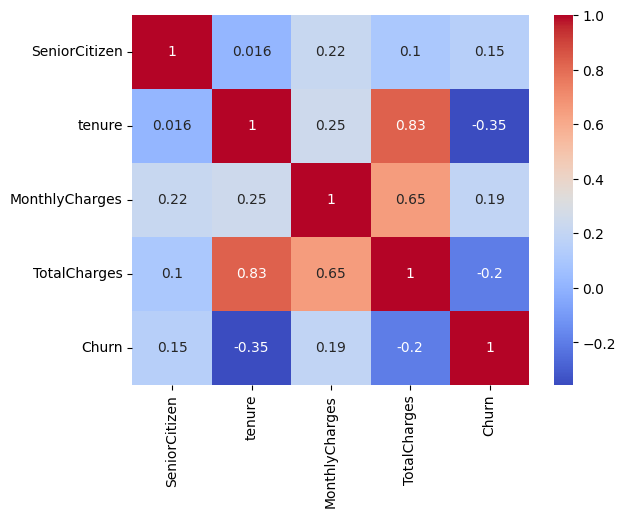

In [ ]:
import seaborn as sns
data.drop(columns=['customerID'], inplace=True)
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)
data.info()
numerical = data.select_dtypes(include=['int64', 'float64'])
correlation_matix = data[numerical.columns].corr()
sns.heatmap(correlation_matix, annot=True, cmap='coolwarm')
plt.show()

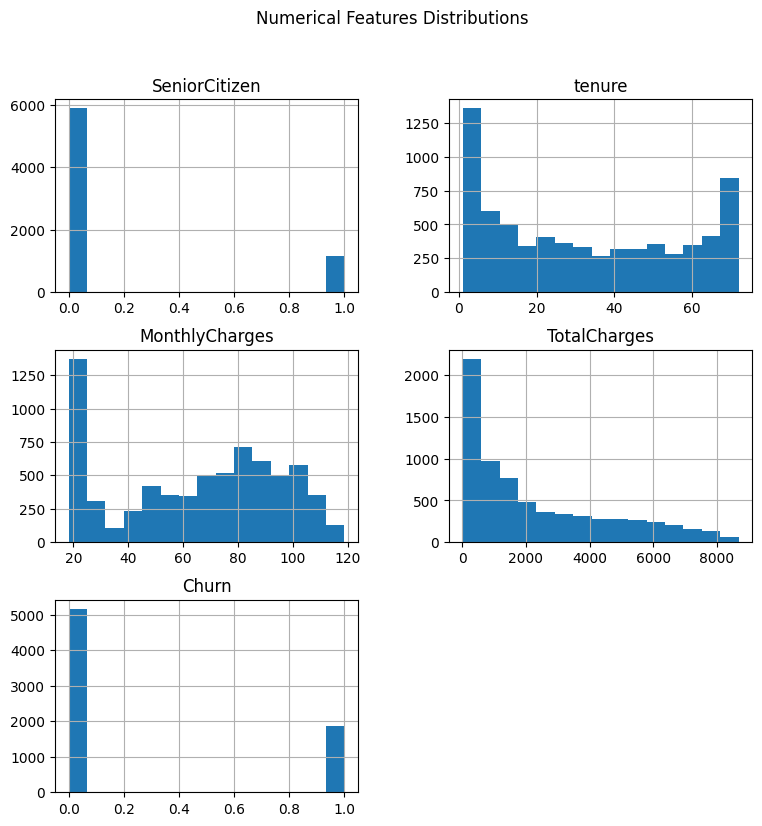

In [ ]:
numerical.hist(bins=15, figsize=(9, 9))
plt.suptitle("Numerical Features Distributions")
plt.show()

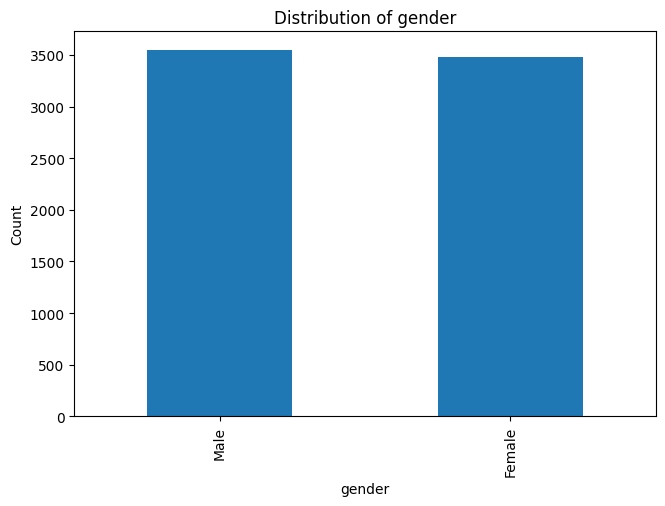

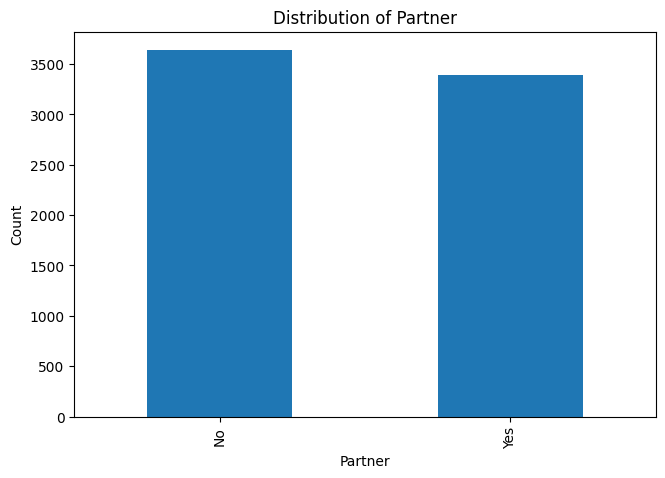

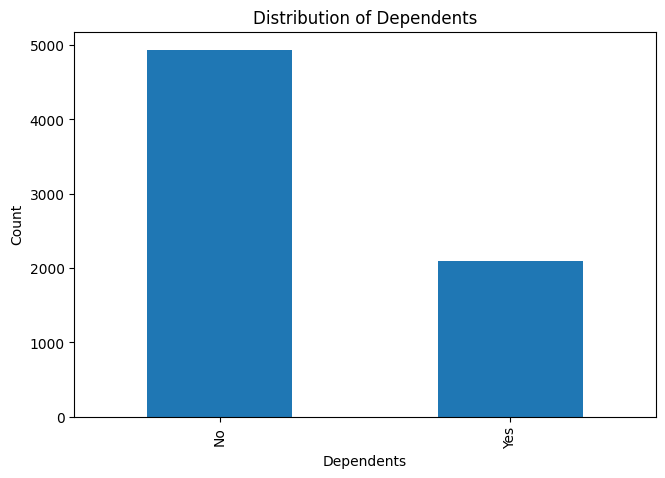

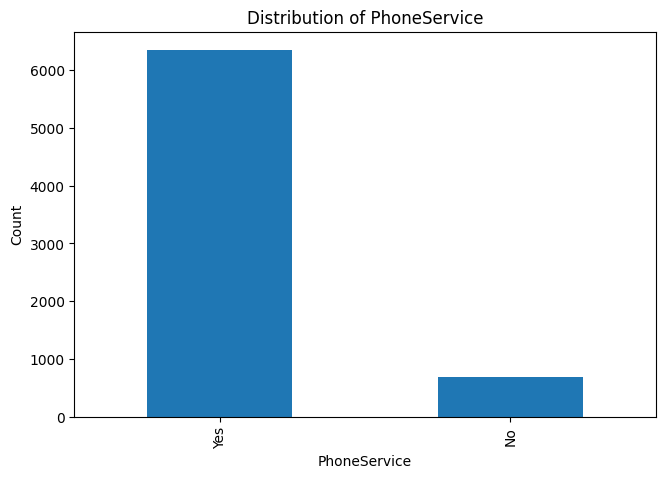

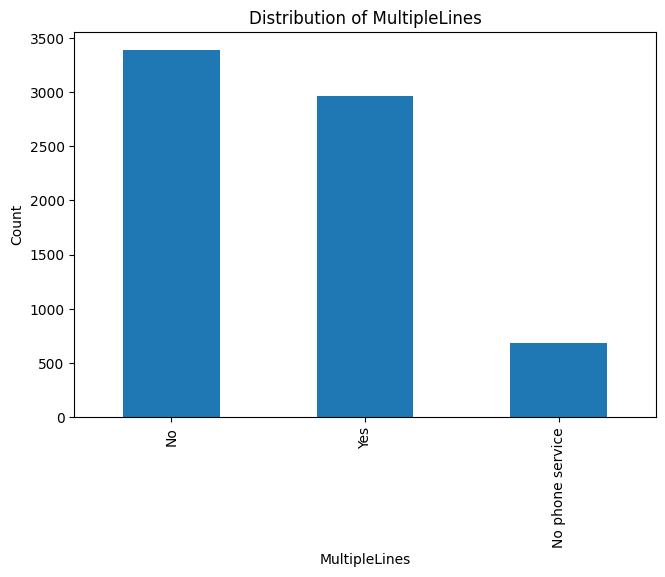

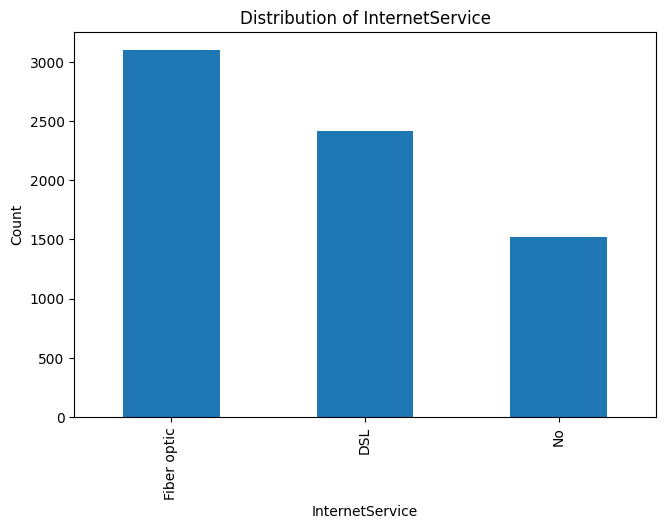

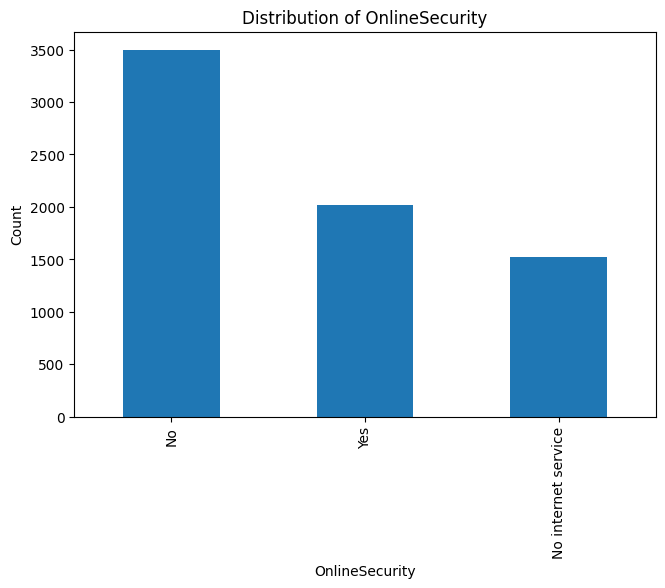

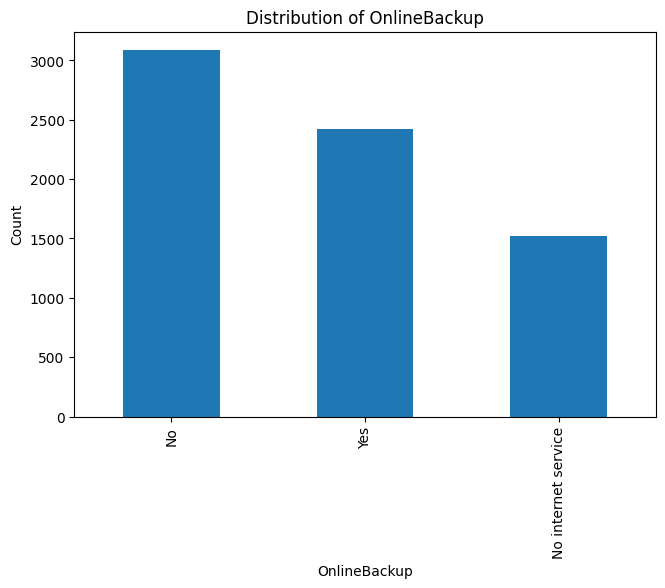

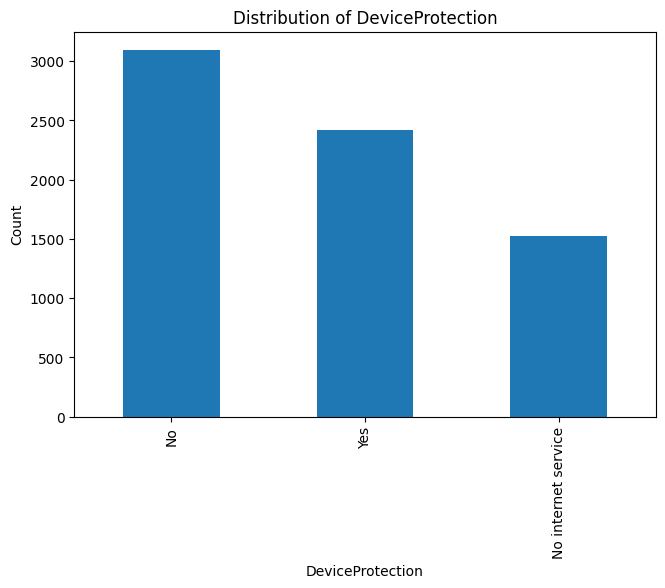

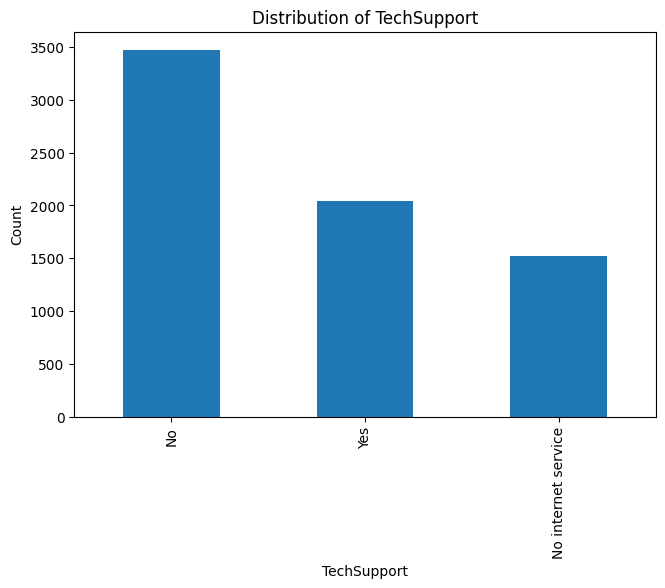

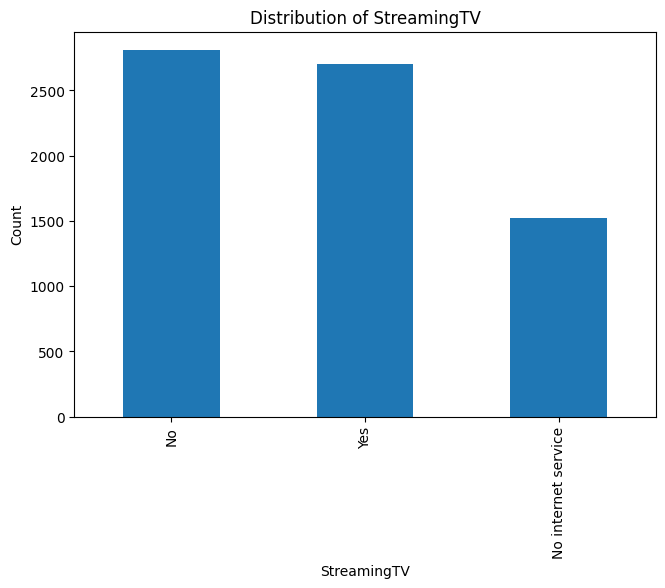

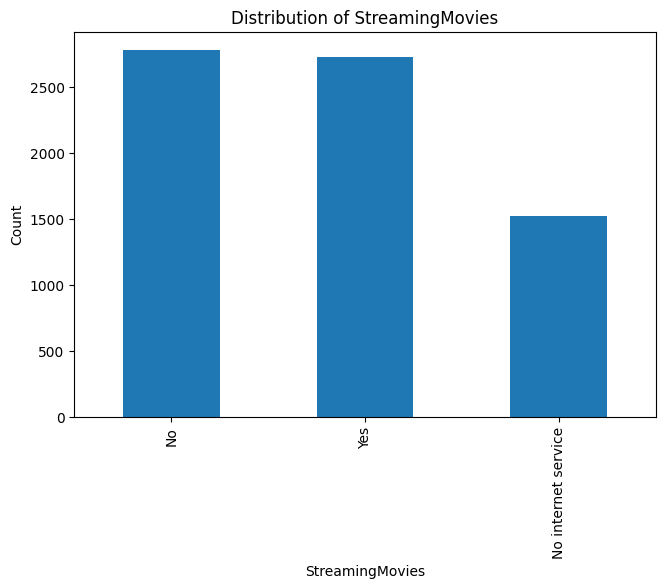

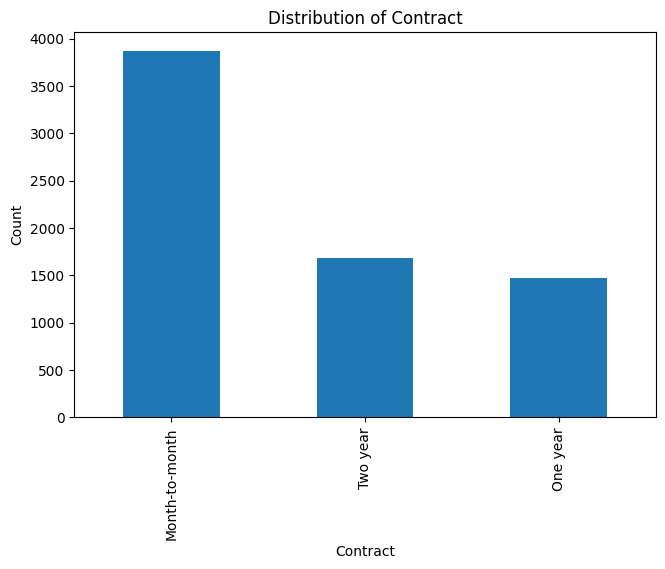

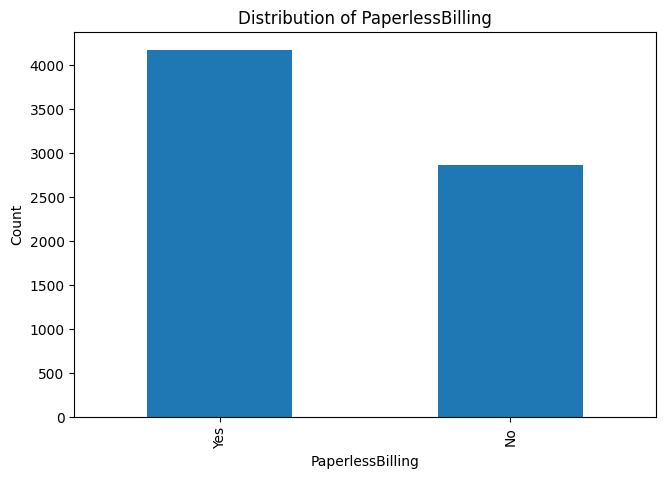

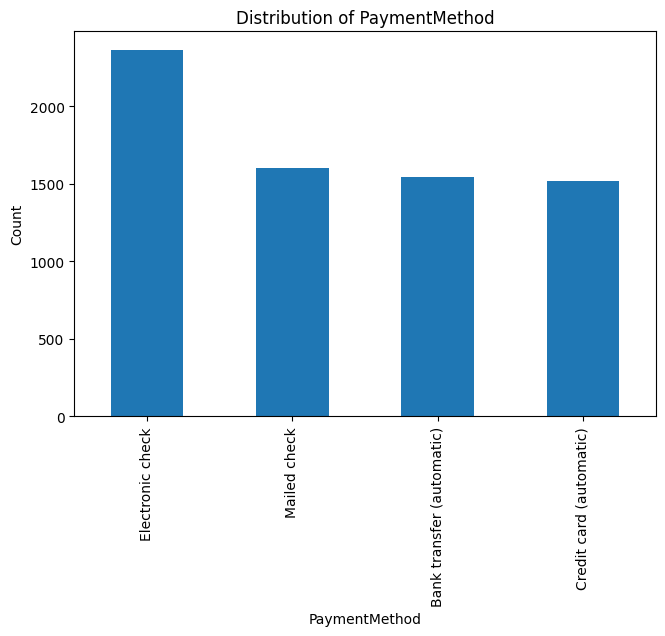

In [ ]:
categorical_columns = data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    data[col].value_counts().plot(kind='bar', figsize=(7.5, 5), title=f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [ ]:
#Handling skew data
for feature in numerical:
  skewness = data[feature].skew()
  print(f"Skewness of {feature}: {skewness:.2f}")

Skewness of SeniorCitizen: 1.83
Skewness of tenure: 0.24
Skewness of MonthlyCharges: -0.22
Skewness of TotalCharges: 0.96
Skewness of Churn: 1.06


Skewness after sqrt: 0.3089261418986736


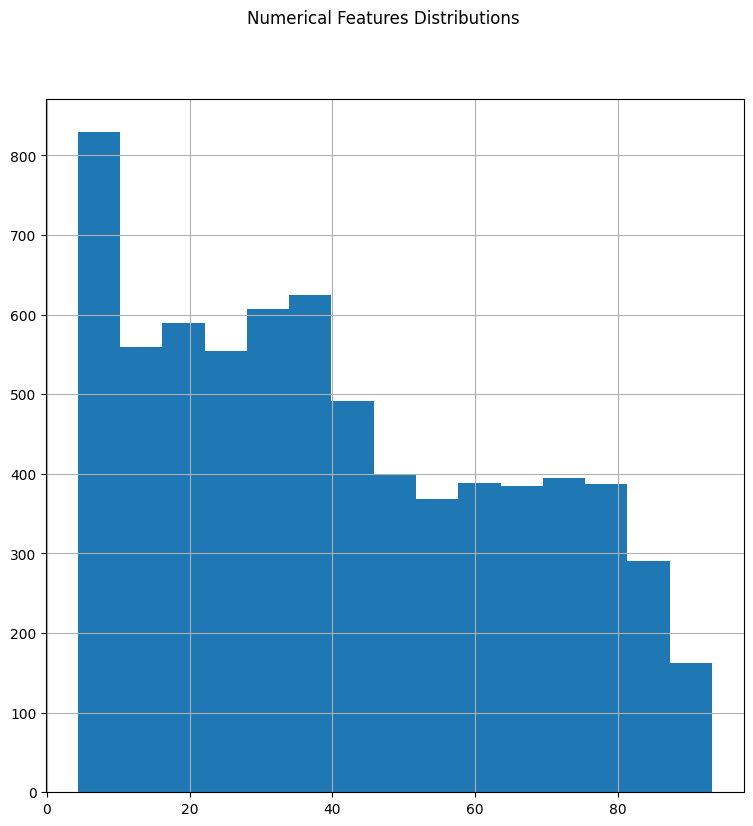

In [ ]:
#Elminating the skewness of Total Charges

import numpy as np

data['totalcharges_transformed'] = np.sqrt(data['TotalCharges'])
print("Skewness after sqrt:", data['totalcharges_transformed'].skew())

data['totalcharges_transformed'].hist(bins=15, figsize=(9, 9))
plt.suptitle("Numerical Features Distributions")
plt.show()

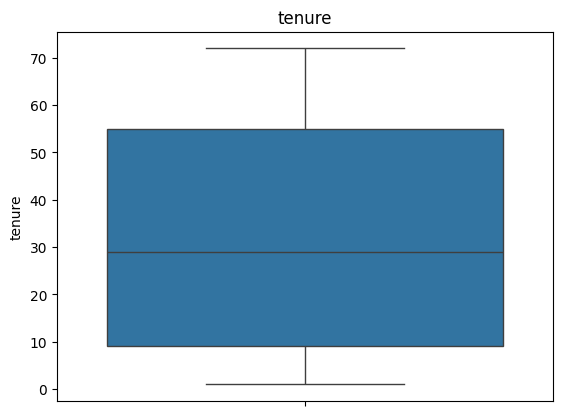

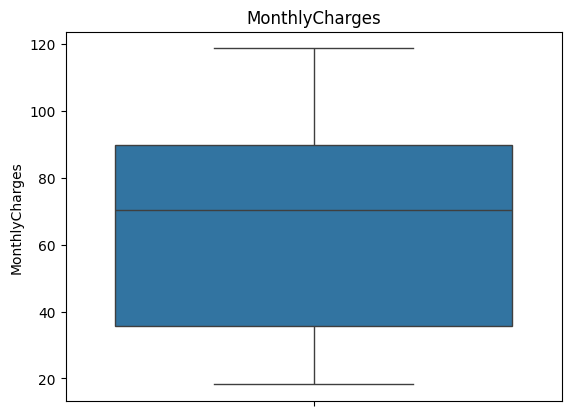

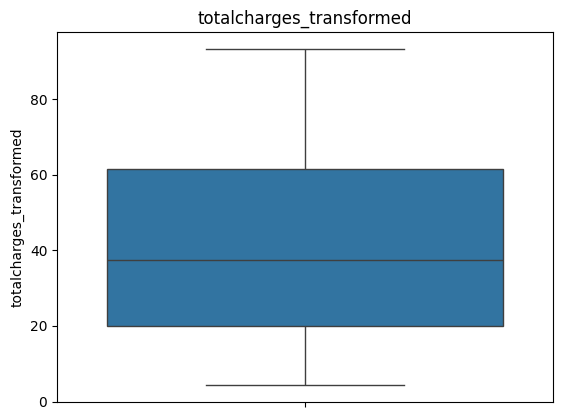

In [ ]:
#checking outliers
cols = ['tenure', 'MonthlyCharges', 'totalcharges_transformed']

for item in cols:
  sns.boxplot(data=data[item])
  plt.title(item)
  plt.show()

In [ ]:
lable_encode_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to binary columns
for col in lable_encode_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
new_cat_coloumns = data.select_dtypes(include=["object"]).columns

data_encoded = pd.get_dummies(data, columns = new_cat_coloumns, drop_first=True)

data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  totalcharges_transformed               7032 non-null   float64
 11  MultipleL

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'totalcharges_transformed']

# Initialize scaler
scaler = StandardScaler()

# Scale numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  totalcharges_transformed               7032 non-null   float64
 11  MultipleL

In [ ]:
#split data

# Separate features and target
X = data_encoded.drop(['Churn', 'TotalCharges'], axis=1)
y = data_encoded['Churn']

# Verify the final dataset
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   totalcharges_transformed               7032 non-null   float64
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.info()
y_train.info()
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 6030 to 862
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5625 non-null   int64  
 1   SeniorCitizen                          5625 non-null   int64  
 2   Partner                                5625 non-null   int64  
 3   Dependents                             5625 non-null   int64  
 4   tenure                                 5625 non-null   float64
 5   PhoneService                           5625 non-null   int64  
 6   PaperlessBilling                       5625 non-null   int64  
 7   MonthlyCharges                         5625 non-null   float64
 8   totalcharges_transformed               5625 non-null   float64
 9   MultipleLines_No phone service         5625 non-null   bool   
 10  MultipleLines_Yes                      5625 non-null   bool   
 11  Interne

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_resampled.info(), y_train.info())

<class 'pandas.core.series.Series'>
RangeIndex: 8260 entries, 0 to 8259
Series name: Churn
Non-Null Count  Dtype
--------------  -----
8260 non-null   int64
dtypes: int64(1)
memory usage: 64.7 KB
<class 'pandas.core.series.Series'>
Index: 5625 entries, 6030 to 862
Series name: Churn
Non-Null Count  Dtype
--------------  -----
5625 non-null   int64
dtypes: int64(1)
memory usage: 87.9 KB
None None


In [ ]:
#Train model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate on test data
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407

ROC-AUC: 0.8324412049427709


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

# Evaluate on test data
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1033
           1       0.53      0.70      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.76      0.76      1407

ROC-AUC: 0.8216683663696931


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate on test data
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.53      0.63      0.57       374

    accuracy                           0.75      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.75      0.76      1407



In [ ]:
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred_lr = lr.predict(X_train_resampled)
train_accuracy_lr = accuracy_score(y_train_resampled, y_train_pred_lr)
print("Logistic Regression Training Accuracy:", train_accuracy_lr)

# Testing accuracy
y_test_pred_lr = lr.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print("Logistic Regression Testing Accuracy:", test_accuracy_lr)

Logistic Regression Training Accuracy: 0.8
Logistic Regression Testing Accuracy: 0.7555081734186212


In [ ]:
# Training accuracy
y_train_pred_xgb = xgb.predict(X_train_resampled)
train_accuracy_xgb = accuracy_score(y_train_resampled, y_train_pred_xgb)
print("XGBoost Training Accuracy:", train_accuracy_xgb)

# Testing accuracy
y_test_pred_xgb = xgb.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("XGBoost Testing Accuracy:", test_accuracy_xgb)

XGBoost Training Accuracy: 0.939225181598063
XGBoost Testing Accuracy: 0.7533759772565742


In [ ]:
#Hyperparameter tuning for XGBoost

parameter_grid = {
    #tree stucture
    'max_depth' : [3,5],
    'min_child_weight': [1, 5],

    #regulaization
    'reg_alpha': [0, 0.1],              # L1 regularization
    'reg_lambda': [0.5, 1],             # L2 regularization

    # Learning rate and boosting rounds
    'learning_rate': [0.01, 0.1],       # Lower learning rate for better generalization
    'n_estimators': [100, 200],         # Number of trees

    # Random subsampling
    'subsample': [0.8, 1],              #% of training data sampled per tree
    'colsample_bytree': [0.8, 1]        #% of features sampled per tree
}



In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=parameter_grid,
    scoring='recall',  # Focus on minimizing false negatives
    cv=5,              # 5-fold cross-validation
    n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0, 0.1], 'reg_lambda': [0.5, 1],
                         'subsample': [0.8, 1]},
             scoring='recall')

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 1}
Best recall score: 0.8539951573849878


In [ ]:
# Get the best model
best_xgb = grid_search.best_estimator_

# Train with best parameters
best_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Training accuracy
y_train_pred = best_xgb.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Testing accuracy
y_test_pred = best_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Classification report (focus on recall for churn class)
print(classification_report(y_test, y_test_pred))

# ROC-AUC
y_test_proba = best_xgb.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba))

Training Accuracy: 0.8884987893462469
Testing Accuracy: 0.746268656716418
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1033
           1       0.52      0.68      0.59       374

    accuracy                           0.75      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.75      0.76      1407

ROC-AUC: 0.8107984635374875


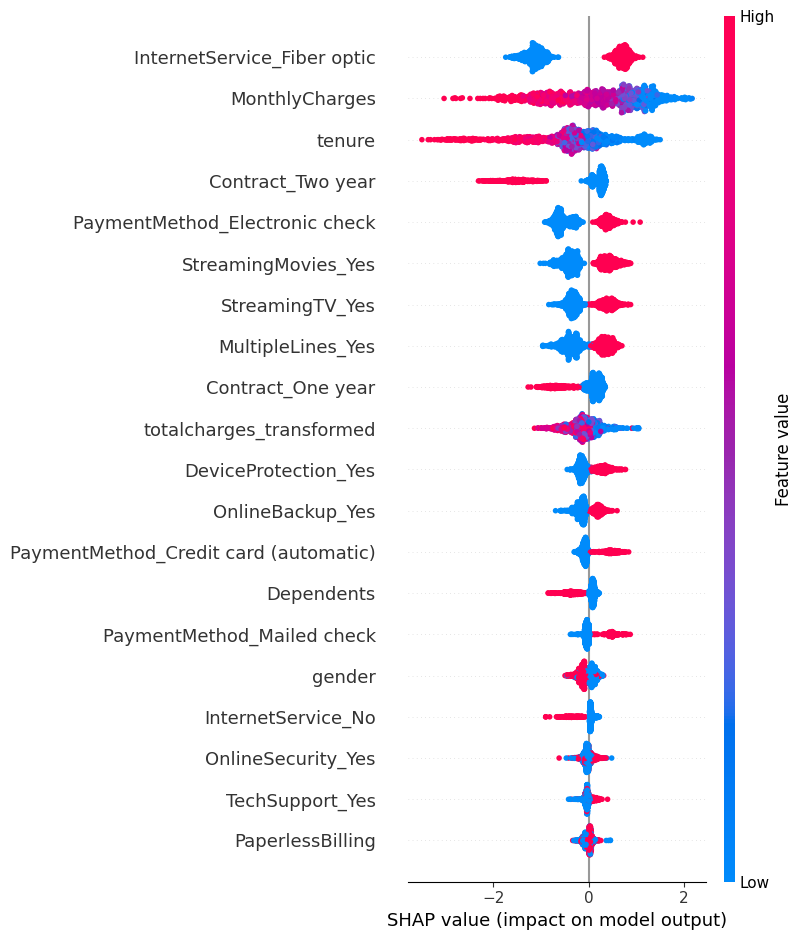

In [ ]:
import shap

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Force plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], feature_names=X.columns)

In [ ]:
import joblib
import shap

# Save the trained model
joblib.dump(best_xgb, 'churn_model.pkl')

# Save the SHAP explainer
explainer = shap.TreeExplainer(best_xgb)
joblib.dump(explainer, 'shap_explainer.pkl')

['shap_explainer.pkl']